In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用SiHei字体正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import matplotlib.font_manager as fm

In [2]:
data = pd.read_csv('SuperStore.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID            9994 non-null int64
Order ID          9994 non-null object
Order Date        9994 non-null object
Ship Date         9994 non-null object
Ship Mode         9994 non-null object
Customer ID       9994 non-null object
Customer Name     9994 non-null object
Segment           9994 non-null object
Country/Region    9994 non-null object
City              9994 non-null object
State             9994 non-null object
Postal Code       9983 non-null float64
Region            9994 non-null object
Product ID        9994 non-null object
Category          9994 non-null object
Sub-Category      9994 non-null object
Product Name      9994 non-null object
Sales             9994 non-null float64
Quantity          9994 non-null int64
Discount          9994 non-null float64
Profit            9994 non-null float64
dtypes: float64(4), int64(2), object(15)
memory usage: 1.6+ MB


In [3]:
data.columns = [x.lower().replace(' ','_') for x in data.columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
row_id            9994 non-null int64
order_id          9994 non-null object
order_date        9994 non-null object
ship_date         9994 non-null object
ship_mode         9994 non-null object
customer_id       9994 non-null object
customer_name     9994 non-null object
segment           9994 non-null object
country/region    9994 non-null object
city              9994 non-null object
state             9994 non-null object
postal_code       9983 non-null float64
region            9994 non-null object
product_id        9994 non-null object
category          9994 non-null object
sub-category      9994 non-null object
product_name      9994 non-null object
sales             9994 non-null float64
quantity          9994 non-null int64
discount          9994 non-null float64
profit            9994 non-null float64
dtypes: float64(4), int64(2), object(15)
memory usage: 1.6+ MB


In [5]:
data_sca = (data.loc[:,['category','sub-category','sales','profit']]
                .groupby(['category','sub-category'],as_index = False)
                .sum()
               )
data_sca

,category,sub-category,sales,profit
0,Furniture,Bookcases,114879.9963,-3472.5560
1,Furniture,Chairs,328449.1030,26590.1663
2,Furniture,Furnishings,91705.1640,13059.1436
3,Furniture,Tables,206965.5320,-17725.4811
4,Office Supplies,Appliances,107532.1610,18138.0054
5,Office Supplies,Art,27118.7920,6527.7870
6,Office Supplies,Binders,203412.7330,30221.7633
7,Office Supplies,Envelopes,16476.4020,6964.1767
8,Office Supplies,Fasteners,3024.2800,949.5182
9,Office Supplies,Labels,12486.3120,5546.2540


#### 绘制一个各类商品销售额和利润的散点图

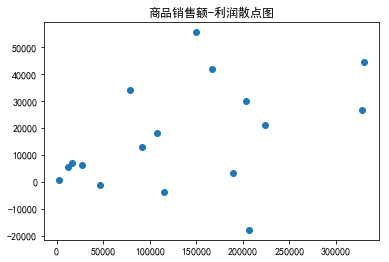

In [6]:
# 新建一个绘图窗口,设置绘图窗口尺寸及分辨率
plt.figure() 

# 添加标题
plt.title('商品销售额-利润散点图')

# 绘制散点图的方法
plt.scatter(data_sca.sales,data_sca.profit)

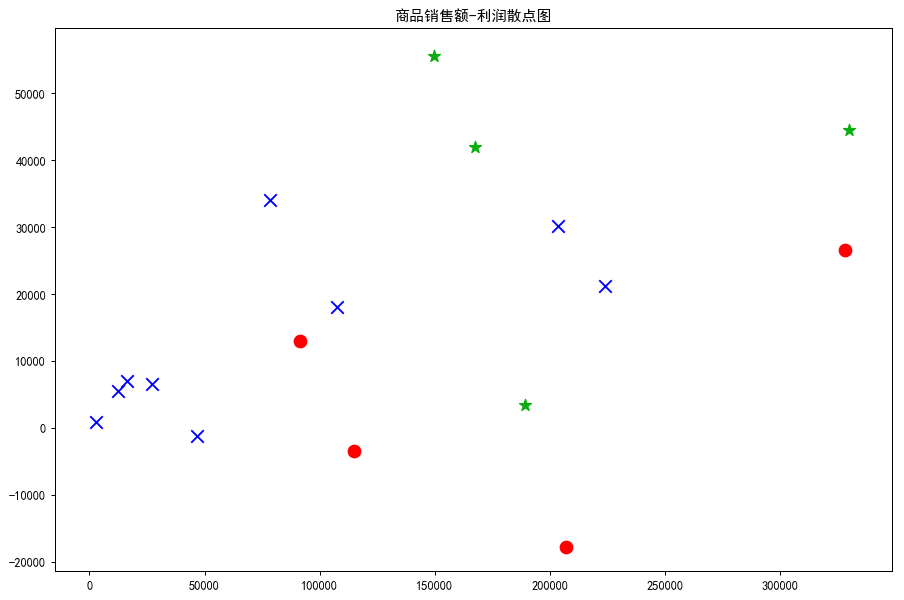

In [7]:
# 新建一个绘图窗口,设置绘图窗口尺寸及分辨率
plt.figure(figsize=(12,8),dpi=90) 

# 添加标题
plt.title('商品销售额-利润散点图')

# 设置图片主题颜色
main_color = (4/255,22/255,70/255,1)

# 用不同的颜色形状来表示三类商品
color_fur = 'r'
color_off = 'blue'
color_tec = '#0AAE0F'

# 绘图
plt.scatter(data_sca[data_sca.category == 'Furniture']['sales'],
            data_sca[data_sca.category == 'Furniture']['profit'],
            c = color_fur,
            marker = 'o',
            s = 100
           )

plt.scatter(data_sca[data_sca.category == 'Office Supplies']['sales'],
            data_sca[data_sca.category == 'Office Supplies']['profit'],
            c = color_off,
            marker = 'x',
            s = 100
           )

plt.scatter(data_sca[data_sca.category == 'Technology']['sales'],
            data_sca[data_sca.category == 'Technology']['profit'],
            c = color_tec,
            marker = '*',
            s = 100
           )
# plt.legend(labels = ['Furniture','Office Supplies','Technology'])

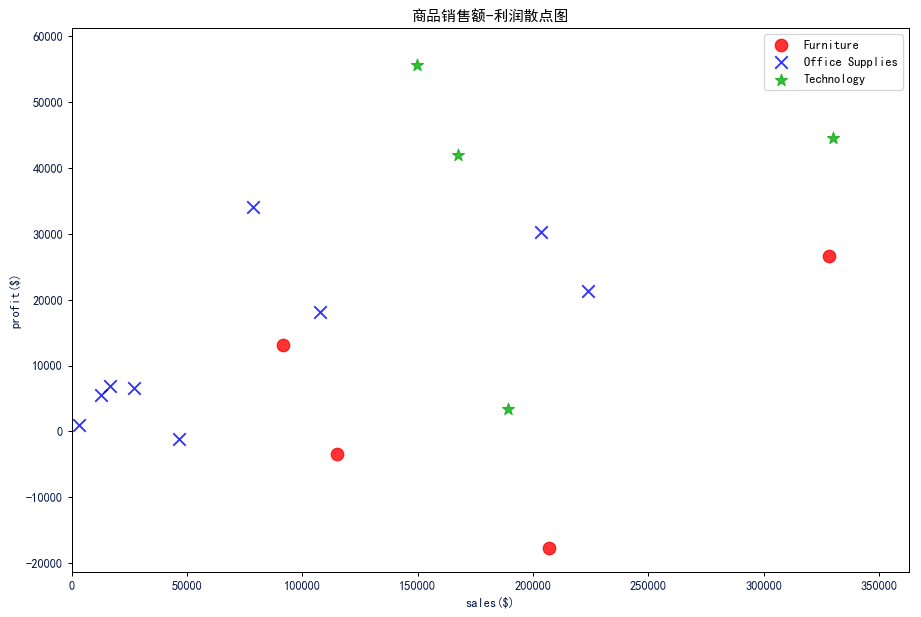

In [8]:
# 添加一些元素便于信息表达的更清楚

# 新建一个绘图窗口,设置绘图窗口尺寸及分辨率
plt.figure(figsize=(12,8),dpi=90) 

# 添加标题
plt.title('商品销售额-利润散点图')

# 设置图片主题颜色
main_color = (4/255,22/255,70/255,1)

# 用不同的颜色形状来表示三类商品
color_fur = 'r'
color_off = 'blue'
color_tec = '#0AAE0F'

# 绘图
plt.scatter(data_sca[data_sca.category == 'Furniture']['sales'], # X轴对应的数据
            data_sca[data_sca.category == 'Furniture']['profit'], # Y轴对应的数据
            c = color_fur, # 设置颜色
            alpha = 0.8, # 设置透明度
            marker = 'o', # 设置点的形状
            s = 100 # 设置点的大小
           )

plt.scatter(data_sca[data_sca.category == 'Office Supplies']['sales'],
            data_sca[data_sca.category == 'Office Supplies']['profit'],
            c = color_off,
            alpha = 0.8,
            marker = 'x',
            s = 100
           )

plt.scatter(data_sca[data_sca.category == 'Technology']['sales'],
            data_sca[data_sca.category == 'Technology']['profit'],
            c = color_tec,
            alpha = 0.8,
            marker = '*',
            s = 100
           )

# 对图表进行美化
# 添加X,Y轴的标题
plt.xlabel('sales($)',color = main_color)
plt.ylabel('profit($)',color = main_color)
plt.xticks(color = main_color)
plt.yticks(color = main_color)

# 设置坐标轴范围
plt.xlim(0,data_sca.sales.max()*1.1)
plt.ylim(data_sca.profit.min()*1.2,data_sca.profit.max()*1.1)

# 添加图例
plt.legend(labels = ['Furniture','Office Supplies','Technology'])

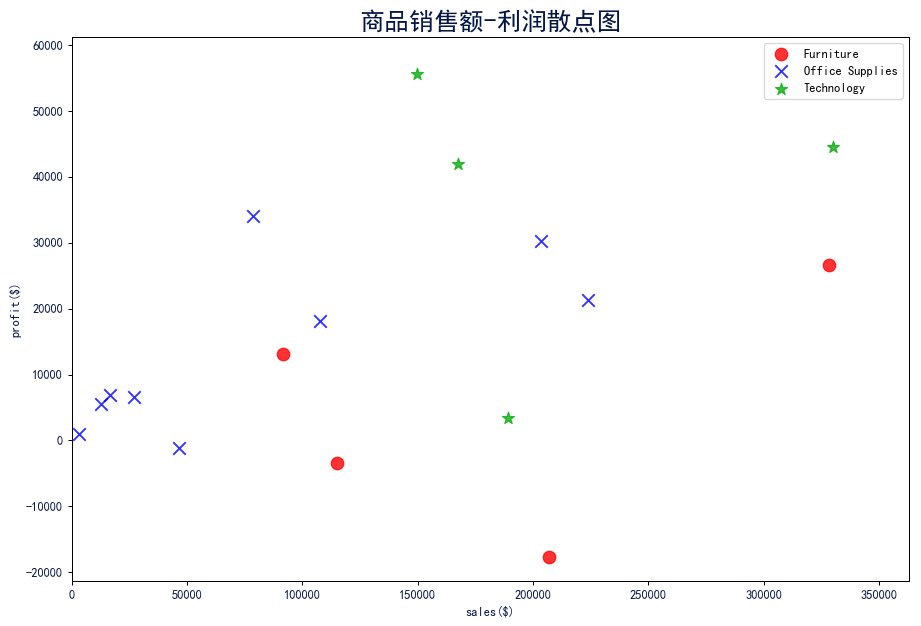

In [9]:
# 添加一些元素便于信息表达的更清楚

# 新建一个绘图窗口,设置绘图窗口尺寸及分辨率
plt.figure(figsize=(12,8),dpi=90) 


# 添加标题
plt.title('商品销售额-利润散点图',fontsize=20, color = main_color)

# 设置图片主题颜色
main_color = (4/255,22/255,70/255,1)

# 用不同的颜色形状来表示三类商品
color_fur = 'r'
color_off = 'blue'
color_tec = '#0AAE0F'

# 绘图
plt.scatter(data_sca[data_sca.category == 'Furniture']['sales'], # X轴对应的数据
            data_sca[data_sca.category == 'Furniture']['profit'], # Y轴对应的数据
            c = color_fur, # 设置颜色
            alpha = 0.8, # 设置透明度
            marker = 'o', # 设置点的形状
            s = 100 # 设置点的大小
           )

plt.scatter(data_sca[data_sca.category == 'Office Supplies']['sales'],
            data_sca[data_sca.category == 'Office Supplies']['profit'],
            c = color_off,
            alpha = 0.8,
            marker = 'x',
            s = 100
           )

plt.scatter(data_sca[data_sca.category == 'Technology']['sales'],
            data_sca[data_sca.category == 'Technology']['profit'],
            c = color_tec,
            alpha = 0.8,
            marker = '*',
            s = 100
           )

# 对图表进行美化
# 添加X,Y轴的标题
plt.xlabel('sales($)',color = main_color)
plt.ylabel('profit($)',color = main_color)
plt.xticks(color = main_color)
plt.yticks(color = main_color)

# 设置坐标轴范围
plt.xlim(0,data_sca.sales.max()*1.1)
plt.ylim(data_sca.profit.min()*1.2,data_sca.profit.max()*1.1)

# 添加图例
plt.legend(labels = ['Furniture','Office Supplies','Technology'])

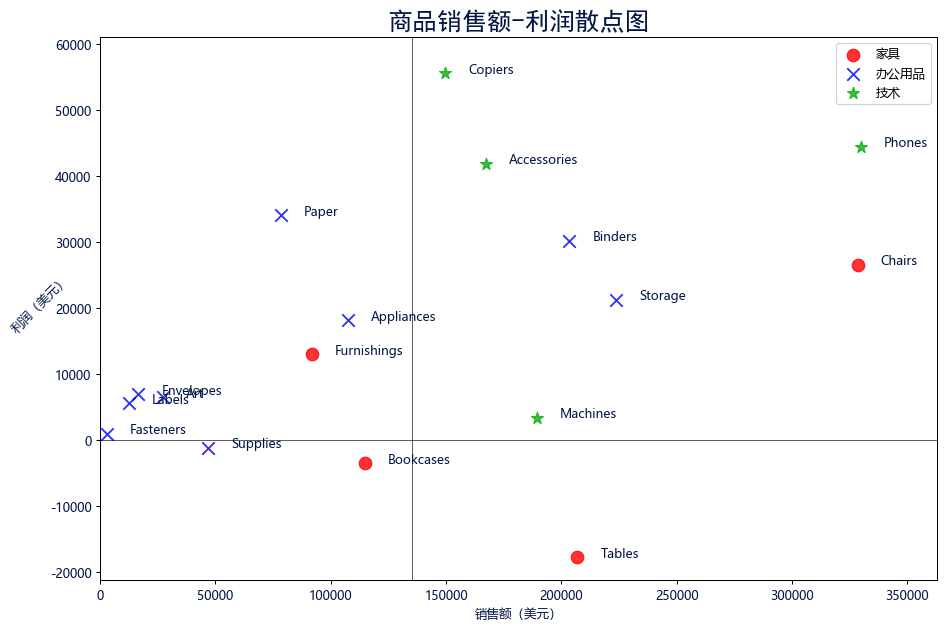

In [10]:
# 添加标签和参考线，设置字体

plt.figure(figsize=(12,8),dpi=90) # 新建一个绘图窗口,设置绘图窗口尺寸及分辨率

font = fm.FontProperties(fname = r'C:\Windows\Fonts\msyh.ttc',size = 10) 

main_color = (4/255,22/255,70/255,1) # 设置图片主题颜色

plt.title('商品销售额-利润散点图',fontsize=20, color = main_color) # 添加标题

color_fur = 'r' # 家具点的颜色
color_off = 'blue' # 办公用品点的颜色
color_tec = '#0AAE0F' # 技术产品点的颜色

plt.scatter(data_sca[data_sca.category == 'Furniture']['sales'], # X轴对应的数据
            data_sca[data_sca.category == 'Furniture']['profit'], # Y轴对应的数据
            c = color_fur, # 设置颜色
            alpha = 0.8, # 设置透明度
            marker = 'o', # 设置点的形状
            s = 100, # 设置点的大小
            label = '家具' # 设置图例标签
           ) # 绘制家具数据的散点

plt.scatter(data_sca[data_sca.category == 'Office Supplies']['sales'],
            data_sca[data_sca.category == 'Office Supplies']['profit'],
            c = color_off,
            alpha = 0.8,
            marker = 'x',
            s = 100,
            label = '办公用品'
           ) # 绘制办公用品数据的散点

plt.scatter(data_sca[data_sca.category == 'Technology']['sales'],
            data_sca[data_sca.category == 'Technology']['profit'],
            c = color_tec,
            alpha = 0.8,
            marker = '*',
            s = 100,
            label = '技术'
           ) # 绘制技术产品数据的散点

plt.xlabel('销售额（美元）',color = main_color, fontproperties = font) # 添加X轴的标题
plt.ylabel('利润（美元）', color = main_color, fontproperties = font, rotation = 45) # 添加Y轴的标题
plt.xticks(color = main_color, fontproperties = font ) # 添加X轴的刻度格式
plt.yticks(color = main_color, fontproperties = font) # 添加Y轴刻度的格式

plt.xlim(0,data_sca.sales.max()*1.1) # 设置X轴范围
plt.ylim(data_sca.profit.min()*1.2,data_sca.profit.max()*1.1) # 设置Y轴范围

# 添加参考线
plt.vlines(x = data_sca.sales.mean(), # 设置参考线对应的X值
           ymin =data_sca.profit.min()*1.2,# 设置参考线对应的y轴最小值
           ymax = data_sca.profit.max()*1.1,# 设置参考线对应的y轴最大值
           linestyles='-',# 设置参考线的形式
           linewidth = 0.5 # 设置参考线的宽度
          ) # 添加竖直参考线
plt.hlines(y = 0, xmin = 0, xmax = data_sca.sales.max()*1.1, linewidth = 0.5) # 添加水平参考线

# 添加标签
for i,r in data_sca.iterrows():
    plt.text(
        r.sales+10000,
        r.profit,
        r['sub-category'],
        fontproperties = font,
        color = main_color
    )

plt.legend(prop=font) # 添加图例

plt.savefig('商品销售额-利润散点图.png')